In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Selected vacation dates:  4/1/17 - 4/13/17
# Calculate the date 1 year ago from the last data point in the database
year_ago = dt.date(2017,4,1) - dt.timedelta(days=365)
year_ago

datetime.date(2016, 4, 1)

In [11]:
# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= year_ago).\
    filter(Measurement.date < '2017-04-01').order_by(Measurement.date).all()
# precipitation

In [12]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
precipitation_df = pd.DataFrame(precipitation, columns = ['Date','Precipitation']).sort_values('Date')
precipitation_df.head(10)

,Date,Precipitation
0,2016-04-01,0.00
1,2016-04-01,0.00
2,2016-04-01,0.00
3,2016-04-01,0.00
4,2016-04-01,0.00
5,2016-04-01,0.00
6,2016-04-01,0.02
7,2016-04-02,0.00
8,2016-04-02,0.02
9,2016-04-02,0.00


In [14]:
precip_df = precipitation_df.set_index('Date')
# precip_df['Date'] = pd.to_datetime(precip_df['Date'], format='%m/%d/%Y')
precip_df.head(10)

,Precipitation
Date,
2016-04-01,0.00
2016-04-01,0.00
2016-04-01,0.00
2016-04-01,0.00
2016-04-01,0.00
2016-04-01,0.00
2016-04-01,0.02
2016-04-02,0.00
2016-04-02,0.02


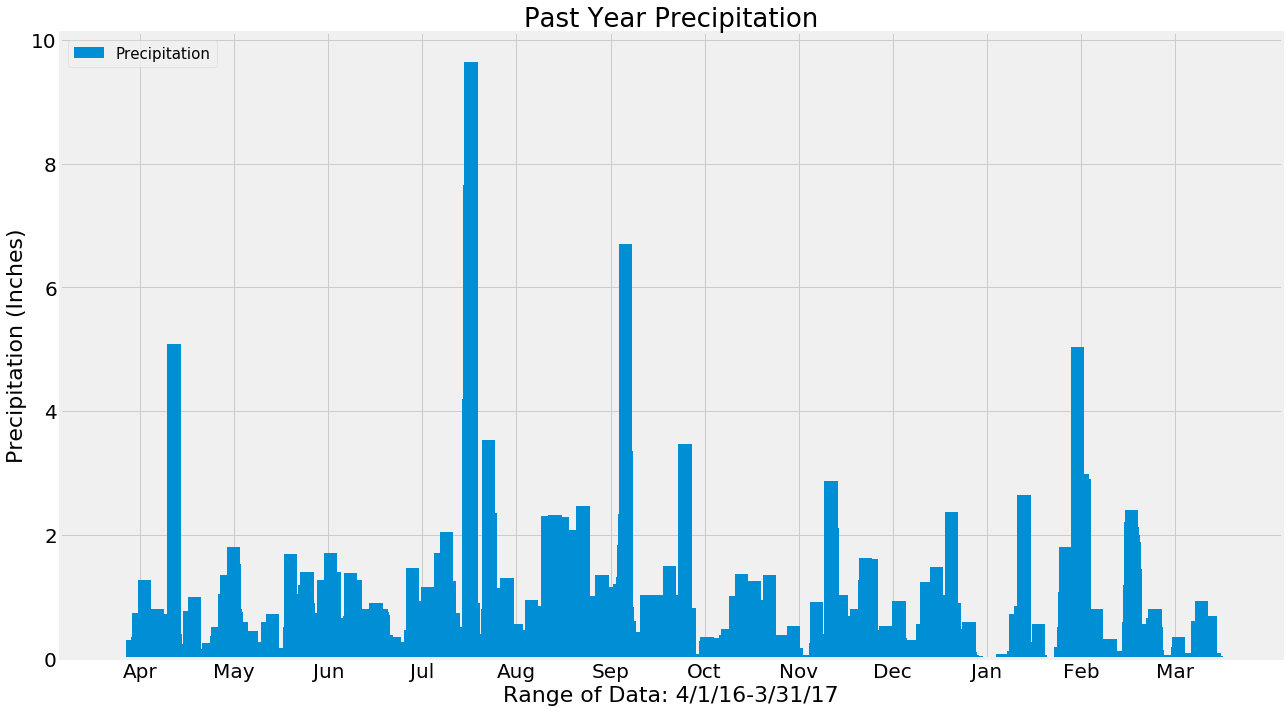

In [39]:
# Use Pandas Plotting with Matplotlib to plot the data

# Cleaned up x-tick labels and locations
# ~~~~~~~~~~~~
month = ["Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec","Jan","Feb","Mar"]
x = np.arange(0, len(precip_df.index.tolist()),1)
y = precip_df["Precipitation"].tolist()
months = len(y)
x_ticks = int((months / 12)*1.03)
tick_locs = [x+50 for x in range(1, months, x_ticks)]
# ~~~~~~~~~~~~

plt.bar(x, y, width=28, align="edge")
plt.xticks(tick_locs, month, size=20)
plt.yticks(size=20)

plt.title("Past Year Precipitation", size=26)
plt.xlabel("Range of Data: 4/1/16-3/31/17", size=22)
plt.ylabel("Precipitation (Inches)", size=22)
plt.legend(["Precipitation"], loc='best', prop={'size':15})
plt.tight_layout()
plt.show()

In [22]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,Precipitation
count,2065.000000
mean,0.202949
std,0.549650
min,0.000000
25%,0.000000
50%,0.020000
75%,0.150000
max,9.640000


In [ ]:
# Design a query to show how many stations are available in this dataset?


In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
